<a href="https://www.kaggle.com/code/didemparlak/imdb-sorting-top-5-movies-bayesian-rating?scriptVersionId=120364667" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## IMBD MOVIE SORTING 

A workplace can find a unique scoring method and a weighted average calculation method for a problem.

As shared in the notebook, IMDB used a unique approach until 2015. Without this approach, it has been shown that the results do not come as desired when they are sorted only according to the comments or the points given.

In other words, if you can describe the subject with a simple mathematical formula according to your own business problem, then this order can be used. This sorting by IMDB is exactly the sorting approach with such a simple mathematical formula.

**The purpose of this notebook: To sort this list, which many people refer to, as the first 250**

## Importing The Libraries

In [1]:
import pandas as pd
import math
import scipy.stats as st
from sklearn.preprocessing import MinMaxScaler

pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.float_format', lambda x: '%.5f' % x)

## Reading the Data

In [2]:
df = pd.read_csv("/kaggle/input/the-movies-dataset/movies_metadata.csv",low_memory=False)

In [3]:
df.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.00000,81.00000,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.70000,5415.00000
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.00000,104.00000,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.90000,2413.00000
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.00000,101.00000,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.50000,92.00000
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.00000,127.00000,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.10000,34.00000
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,/e64sOI48hQXyru7naBFyssKFxVd.jpg,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.00000,106.00000,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.70000,173.00000


After the data is read, there is a decision on the variables associated with the sorting. 


### Reducing the dataframe to variables associated with sorting

In [4]:
df = df[["title", "vote_average", "vote_count"]]

In [5]:
df.head()

,title,vote_average,vote_count
0,Toy Story,7.70000,5415.00000
1,Jumanji,6.90000,2413.00000
2,Grumpier Old Men,6.50000,92.00000
3,Waiting to Exhale,6.10000,34.00000
4,Father of the Bride Part II,5.70000,173.00000


In [6]:
df.shape

(45466, 3)

## Sorting According to Vote Average

In [7]:
df.sort_values("vote_average", ascending=False).head(10)

,title,vote_average,vote_count
21642,Ice Age Columbus: Who Were the First Americans?,10.00000,1.00000
15710,If God Is Willing and da Creek Don't Rise,10.00000,1.00000
22396,Meat the Truth,10.00000,1.00000
22395,Marvin Hamlisch: What He Did For Love,10.00000,1.00000
35343,Elaine Stritch: At Liberty,10.00000,1.00000
186,Reckless,10.00000,1.00000
45047,The Human Surge,10.00000,1.00000
22377,The Guide,10.00000,1.00000
22346,هیچ کجا هیچ کس,10.00000,1.00000
1634,Other Voices Other Rooms,10.00000,1.00000


When movies are sorted according to their average votes, the result is unexpected.

> <div class="alert alert-block alert-danger">
<b></b> When sorted only by average, the number of voters is ignored.
</div>

               


As you can see, although it was voted once, it came at the top of the sorting because it got the highest score of 10 points.

**If there is 1 vote count but it is at the top while sorting, let's try to sort by filtering according to vote count.**

In [8]:
df["vote_count"].describe([0.10, 0.25, 0.50, 0.70, 0.80, 0.90, 0.95, 0.99]).T

count   45460.00000
mean      109.89734
std       491.31037
min         0.00000
10%         1.00000
25%         3.00000
50%        10.00000
70%        25.00000
80%        50.00000
90%       160.00000
95%       434.00000
99%      2183.82000
max     14075.00000
Name: vote_count, dtype: float64

Quarterly values are checked to decide how many vote counts we will choose to sort by filtering.

The average number of vote count of movies is 109. 

The vote count of 95% of the movies is in the 400s.. ___That's why it was decided to have over 400 comments with our own comments.___

In [9]:
df[df["vote_count"] > 400].sort_values("vote_average", ascending=False).head(10)

,title,vote_average,vote_count
10309,Dilwale Dulhania Le Jayenge,9.10000,661.00000
40251,Your Name.,8.50000,1030.00000
834,The Godfather,8.50000,6024.00000
314,The Shawshank Redemption,8.50000,8358.00000
1152,One Flew Over the Cuckoo's Nest,8.30000,3001.00000
1176,Psycho,8.30000,2405.00000
1178,The Godfather: Part II,8.30000,3418.00000
292,Pulp Fiction,8.30000,8670.00000
1184,Once Upon a Time in America,8.30000,1104.00000
5481,Spirited Away,8.30000,3968.00000


We chose more than 400 votes, but was it the right choice?

> <div class="alert alert-block alert-danger">
<b></b> Would it be better to use the effects of vote count and vote average in combination?
</div>


Vote count and vote average need to be on the same scales to sort by combining them together. Otherwise one can be **overwhelming** and their combinations may not give us the correct results.

In [10]:
df["vote_count_score"] = MinMaxScaler(feature_range=(1, 10)).fit(df[["vote_count"]]). \
transform(df[["vote_count"]])

In [11]:
df.head()

,title,vote_average,vote_count,vote_count_score
0,Toy Story,7.70000,5415.00000,4.46252
1,Jumanji,6.90000,2413.00000,2.54295
2,Grumpier Old Men,6.50000,92.00000,1.05883
3,Waiting to Exhale,6.10000,34.00000,1.02174
4,Father of the Bride Part II,5.70000,173.00000,1.11062


Vote average and vote count score are values between **1 and 10.** 
However, they are not currently related to each other. Two separate variables. 

**We can create a new variable by multiplying them and sort accordingly.**


In [12]:
df["average_count_score"] = df["vote_average"] * df["vote_count_score"]

In [13]:
df.sort_values("average_count_score", ascending=False).head(10)

,title,vote_average,vote_count,vote_count_score,average_count_score
15480,Inception,8.10000,14075.00000,10.00000,81.00000
12481,The Dark Knight,8.30000,12269.00000,8.84519,73.41505
22879,Interstellar,8.10000,11187.00000,8.15332,66.04190
17818,The Avengers,7.40000,12000.00000,8.67318,64.18153
14551,Avatar,7.20000,12114.00000,8.74607,62.97174
26564,Deadpool,7.40000,11444.00000,8.31766,61.55065
2843,Fight Club,8.30000,9678.00000,7.18842,59.66388
20051,Django Unchained,7.80000,10297.00000,7.58423,59.15697
23753,Guardians of the Galaxy,7.90000,10014.00000,7.40327,58.48582
292,Pulp Fiction,8.30000,8670.00000,6.54387,54.31414


In this way, in a simple order, the known movies appeared at the top.

## IMDB Weighted Rating

This is a score that IMDB used until 2015. 


In other words, it is **not** just a sorting according to the number of points or comments given in the data set, as it was applied at the beginning. 

IMDB developed an approach to ranking by giving specific weights to variables that affect sorting.

> <div class="alert alert-block alert-danger">
<b>weighted_rating =</b> (v/(v+M) * r) + (M/(v+M) * C)
</div>


* **r = vote average**
* **v = vote count**
* **M = minimum votes required to be listed in the Top 250**
* **C = the mean vote across the whole report (currently 7.0)**

In [14]:
df.sort_values("average_count_score", ascending=False).head(10)

,title,vote_average,vote_count,vote_count_score,average_count_score
15480,Inception,8.10000,14075.00000,10.00000,81.00000
12481,The Dark Knight,8.30000,12269.00000,8.84519,73.41505
22879,Interstellar,8.10000,11187.00000,8.15332,66.04190
17818,The Avengers,7.40000,12000.00000,8.67318,64.18153
14551,Avatar,7.20000,12114.00000,8.74607,62.97174
26564,Deadpool,7.40000,11444.00000,8.31766,61.55065
2843,Fight Club,8.30000,9678.00000,7.18842,59.66388
20051,Django Unchained,7.80000,10297.00000,7.58423,59.15697
23753,Guardians of the Galaxy,7.90000,10014.00000,7.40327,58.48582
292,Pulp Fiction,8.30000,8670.00000,6.54387,54.31414


The Deadpool movie seems to have come higher than it should have been. Let's select that movie and do the scoring

In [15]:
M = 2500
C = df['vote_average'].mean()

In [16]:
def weighted_rating(r, v, M, C):
    return (v / (v + M) * r) + (M / (v + M) * C)

In [17]:
#r=vote_average, v= vote_count 
#for deadpool movie r=7.40000, v=11444.00000
weighted_rating(7.40000, 11444.00000, M, C)

7.080544896574546

df.sort_values("average_count_score", ascending=False).head(10) 
* With this average count score, the vote scoring for the deadpool movie was 7.40.
* With the approach of IMDB (weighted_rating), this value came to 7.0805.

__Now let's apply this to all the movies instead of only Deadpool__

In [18]:
df["weighted_rating"] = weighted_rating(df["vote_average"],
                                        df["vote_count"], M, C)

In [19]:
#This is the IMBD sorting
df.sort_values("weighted_rating", ascending=False).head(10)

,title,vote_average,vote_count,vote_count_score,average_count_score,weighted_rating
12481,The Dark Knight,8.30000,12269.00000,8.84519,73.41505,7.84604
314,The Shawshank Redemption,8.50000,8358.00000,6.34437,53.92714,7.83648
2843,Fight Club,8.30000,9678.00000,7.18842,59.66388,7.74946
15480,Inception,8.10000,14075.00000,10.00000,81.00000,7.72567
292,Pulp Fiction,8.30000,8670.00000,6.54387,54.31414,7.69978
834,The Godfather,8.50000,6024.00000,4.85194,41.24146,7.65480
22879,Interstellar,8.10000,11187.00000,8.15332,66.04190,7.64669
351,Forrest Gump,8.20000,8147.00000,6.20945,50.91748,7.59377
7000,The Lord of the Rings: The Return of the King,8.10000,8226.00000,6.25996,50.70571,7.52155
4863,The Lord of the Rings: The Fellowship of the Ring,8.00000,8892.00000,6.68583,53.48661,7.47731


In [20]:
#this is the our average_count_score sorting
#df["average_count_score"] = df["vote_average"] * df["vote_count_score"] -just for remembering

df.sort_values("average_count_score", ascending=False).head(10)

,title,vote_average,vote_count,vote_count_score,average_count_score,weighted_rating
15480,Inception,8.10000,14075.00000,10.00000,81.00000,7.72567
12481,The Dark Knight,8.30000,12269.00000,8.84519,73.41505,7.84604
22879,Interstellar,8.10000,11187.00000,8.15332,66.04190,7.64669
17818,The Avengers,7.40000,12000.00000,8.67318,64.18153,7.09279
14551,Avatar,7.20000,12114.00000,8.74607,62.97174,6.92940
26564,Deadpool,7.40000,11444.00000,8.31766,61.55065,7.08054
2843,Fight Club,8.30000,9678.00000,7.18842,59.66388,7.74946
20051,Django Unchained,7.80000,10297.00000,7.58423,59.15697,7.37377
23753,Guardians of the Galaxy,7.90000,10014.00000,7.40327,58.48582,7.44415
292,Pulp Fiction,8.30000,8670.00000,6.54387,54.31414,7.69978


***Although not in the same order as IMDB, the top 5 were obtained in a similar way with a very simple approach.***
* Each firm can develop its own sorting approach, such as IMDB, for its own business problem.



According to the ranking used by IMBD until 2015
1. The Dark Knight
2. The Shawshank Redemption
3. Fight Club
4. Inception
5. Pulp Fiction

Current IMBD sorting


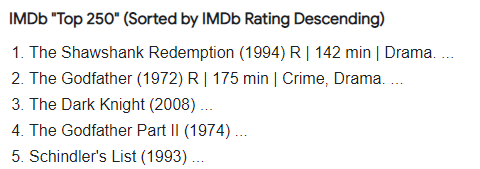

__It is seen that the order of the first 5 films has changed. So what kind of method could they have used after 2015?__

# Bayesian Average Rating Score

In [21]:
def bayesian_average_rating(n, confidence=0.95):
    if sum(n) == 0:
        return 0
    K = len(n)
    z = st.norm.ppf(1 - (1 - confidence) / 2)
    N = sum(n)
    first_part = 0.0
    second_part = 0.0
    for k, n_k in enumerate(n):
        first_part += (k + 1) * (n[k] + 1) / (N + K)
        second_part += (k + 1) * (k + 1) * (n[k] + 1) / (N + K)
    score = first_part - z * math.sqrt((second_part - first_part * first_part) / (N + K + 1))
    return score

In [22]:
#Calculating the IMDB scor for The Shawshank Redemption
bayesian_average_rating([34733, 4355, 4704, 6561, 13515, 26183, 87368, 273082, 600260, 1295351])
#34733 is the number of 1 point
#4355 is the number of 2 points and goes like this..

9.14538444560111

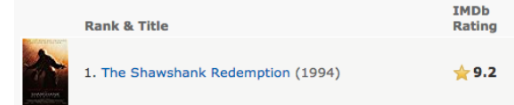

* Current IMBD sorting is 9.2.
* For the same movie, bayesian_average_rating is 9.14


When we want to apply Bayesian to the whole dataset, there is no separate number of vote counts from 1 to 10 in this dataset. Thats why reading the rating dataset.

In [23]:
df_rate = pd.read_csv("/kaggle/input/rating/imdb_ratings.csv")

In [24]:
df_rate["bar_score"] = df_rate.apply(lambda x: bayesian_average_rating(x[["one", "two", "three", "four", "five",
                                                                "six", "seven", "eight", "nine", "ten"]]), axis=1)

In [25]:
df_rate.sort_values("bar_score", ascending=False).head(10)

,Unnamed: 0,id,movieName,rating,ten,nine,eight,seven,six,five,four,three,two,one,bar_score
0,0,111161,1. The Shawshank Redemption (1994),9.20000,1295382,600284,273091,87368,26184,13515,6561,4704,4355,34733,9.14539
1,1,68646,2. The Godfather (1972),9.10000,837932,402527,199440,78541,30016,16603,8419,6268,5879,37128,8.94002
3,3,468569,4. The Dark Knight (2008),9.00000,1034863,649123,354610,137748,49483,23237,11429,8082,7173,30345,8.89596
2,2,71562,3. The Godfather: Part II (1974),9.00000,486356,324905,175507,70847,26349,12657,6210,4347,3892,20469,8.81250
4,4,50083,5. 12 Angry Men (1957),8.90000,246765,225437,133998,48341,15773,6278,2866,1723,1478,8318,8.76793
6,6,167260,7. The Lord of the Rings: The Return of ...,8.90000,703093,433087,270113,117411,44760,21818,10873,7987,6554,28990,8.75204
5,5,108052,6. Schindler's List (1993),8.90000,453906,383584,220586,82367,27219,12922,6234,4572,4289,19328,8.74361
11,11,109830,12. Forrest Gump (1994),8.80000,622104,553654,373644,151284,51140,22720,11692,7647,5941,12110,8.69915
12,12,1375666,13. Inception (2010),8.70000,724798,627987,408686,174229,60668,26910,13436,8703,6932,17621,8.69315
10,10,137523,11. Fight Club (1999),8.80000,637087,572654,371752,152295,53059,24755,12648,8606,6948,17435,8.67448


Current IMBD

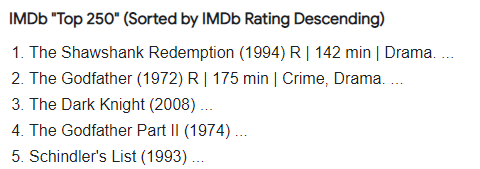

**In conclusion; similar result to IMBD ranking with bayesian_average_rating.**

Thank you so much if you've read this far.